In [2]:
# %% [1] استيراد المكتبات
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
folder_path = r"C:\Users\USER\data\Divvy"
all_files = glob.glob(os.path.join(folder_path, "2024??-divvy-tripdata.csv")) + \
            glob.glob(os.path.join(folder_path, "2025??-divvy-tripdata.csv"))

In [4]:
# قراءة ودمج الملفات
df_list = [pd.read_csv(f) for f in all_files]
all_data = pd.concat(df_list, ignore_index=True)

In [5]:
# %% [3] معاينة البيانات
print(all_data.head())
print(all_data.columns)

            ride_id  rideable_type               started_at  \
0  2658E319B13141F9  electric_bike  2024-07-11 08:15:14.784   
1  B2176315168A47CE  electric_bike  2024-07-11 15:45:07.851   
2  C2A9D33DF7EBB422  electric_bike  2024-07-11 08:24:48.192   
3  8BFEA406DF01D8AD  electric_bike  2024-07-11 08:46:06.864   
4  ECD3EF02E5EB73B6  electric_bike  2024-07-11 18:18:16.588   

                  ended_at start_station_name start_station_id  \
0  2024-07-11 08:17:56.335                NaN              NaN   
1  2024-07-11 16:06:04.243                NaN              NaN   
2  2024-07-11 08:28:05.237                NaN              NaN   
3  2024-07-11 09:14:11.664                NaN              NaN   
4  2024-07-11 18:30:20.288                NaN              NaN   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN      41.80     -87.59    41.79   -87.59   
1              NaN            NaN      41.79     -87.60    41.80   -87

In [6]:
# %% [4] تحويل الأعمدة الزمنية وحساب مدة الرحلة بالدقائق
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])
all_data['ride_duration_min'] = (all_data['ended_at'] - all_data['started_at']).dt.total_seconds() / 60

In [7]:
all_data = all_data[all_data['ride_duration_min'] > 0]

In [8]:
all_data['day_of_week'] = all_data['started_at'].dt.day_name()
all_data['hour'] = all_data['started_at'].dt.hour

In [9]:
print(all_data.head())
print(all_data.columns)

            ride_id  rideable_type              started_at  \
0  2658E319B13141F9  electric_bike 2024-07-11 08:15:14.784   
1  B2176315168A47CE  electric_bike 2024-07-11 15:45:07.851   
2  C2A9D33DF7EBB422  electric_bike 2024-07-11 08:24:48.192   
3  8BFEA406DF01D8AD  electric_bike 2024-07-11 08:46:06.864   
4  ECD3EF02E5EB73B6  electric_bike 2024-07-11 18:18:16.588   

                 ended_at start_station_name start_station_id  \
0 2024-07-11 08:17:56.335                NaN              NaN   
1 2024-07-11 16:06:04.243                NaN              NaN   
2 2024-07-11 08:28:05.237                NaN              NaN   
3 2024-07-11 09:14:11.664                NaN              NaN   
4 2024-07-11 18:30:20.288                NaN              NaN   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN      41.80     -87.59    41.79   -87.59   
1              NaN            NaN      41.79     -87.60    41.80   -87.59   
2    

In [10]:
avg_duration = all_data.groupby('member_casual')['ride_duration_min'].mean().reset_index()
print(avg_duration)

  member_casual  ride_duration_min
0        casual          23.798788
1        member          12.187194


In [11]:
rides_per_day = all_data.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_count')

In [12]:
print(all_data.head())
print(all_data.columns)

            ride_id  rideable_type              started_at  \
0  2658E319B13141F9  electric_bike 2024-07-11 08:15:14.784   
1  B2176315168A47CE  electric_bike 2024-07-11 15:45:07.851   
2  C2A9D33DF7EBB422  electric_bike 2024-07-11 08:24:48.192   
3  8BFEA406DF01D8AD  electric_bike 2024-07-11 08:46:06.864   
4  ECD3EF02E5EB73B6  electric_bike 2024-07-11 18:18:16.588   

                 ended_at start_station_name start_station_id  \
0 2024-07-11 08:17:56.335                NaN              NaN   
1 2024-07-11 16:06:04.243                NaN              NaN   
2 2024-07-11 08:28:05.237                NaN              NaN   
3 2024-07-11 09:14:11.664                NaN              NaN   
4 2024-07-11 18:30:20.288                NaN              NaN   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN      41.80     -87.59    41.79   -87.59   
1              NaN            NaN      41.79     -87.60    41.80   -87.59   
2    

In [14]:
print(avg_duration)

  member_casual  ride_duration_min
0        casual          23.798788
1        member          12.187194


In [13]:
print(rides_per_day)

   day_of_week member_casual  ride_count
0       Friday        casual      320844
1       Friday        member      520981
2       Monday        casual      246850
3       Monday        member      522639
4     Saturday        casual      427468
5     Saturday        member      459947
6       Sunday        casual      335801
7       Sunday        member      384768
8     Thursday        casual      262745
9     Thursday        member      552671
10     Tuesday        casual      224488
11     Tuesday        member      550117
12   Wednesday        casual      237033
13   Wednesday        member      550635


In [14]:
# ترتيب أيام الأسبوع بشكل صحيح
days_order = ["Saturday", "Sunday" , "Monday", "Tuesday", "Wednesday", "Thursday", "Friday" ]
rides_per_day['day_of_week'] = pd.Categorical(rides_per_day['day_of_week'], categories=days_order, ordered=True)
rides_per_day = rides_per_day.sort_values('day_of_week')


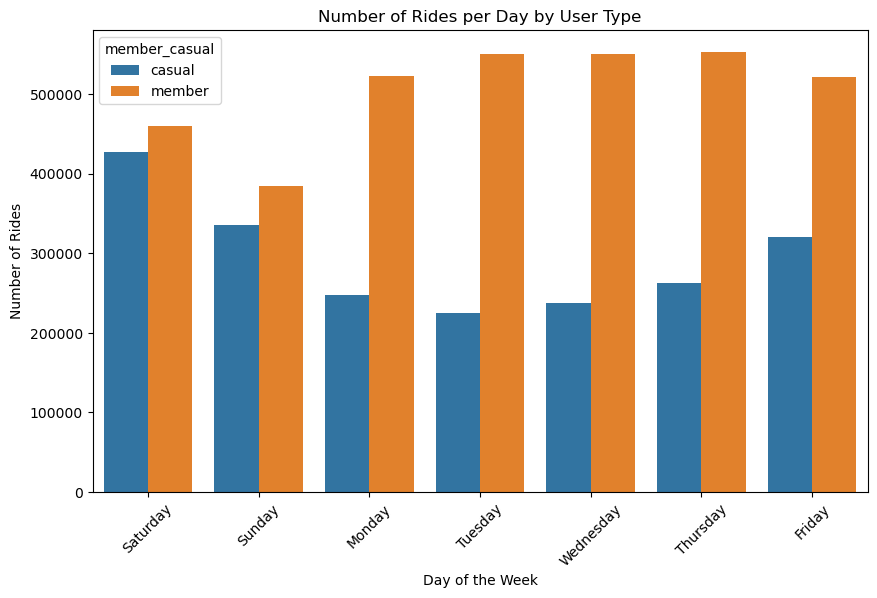

In [15]:
# %% [8] رسم عدد الرحلات حسب اليوم ونوع المستخدم
plt.figure(figsize=(10,6))
sns.barplot(data=rides_per_day, x='day_of_week', y='ride_count', hue='member_casual')
plt.title("Number of Rides per Day by User Type")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.savefig("rides_per_day.png", dpi=300, bbox_inches='tight')
plt.show()

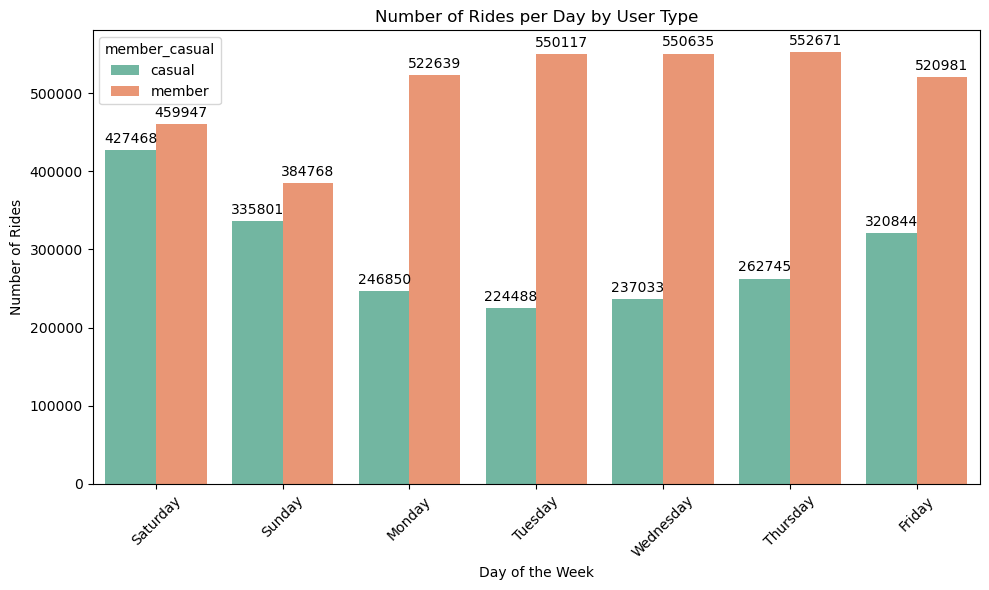

In [16]:
# حجم الشكل
plt.figure(figsize=(10, 6))

# رسم الأعمدة
ax = sns.barplot(data=rides_per_day, x='day_of_week', y='ride_count', hue='member_casual', palette='Set2')

# إظهار الأرقام فوق كل عمود
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# العناوين والتسميات
plt.title('Number of Rides per Day by User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [17]:
#تحليل الاستخدام حسب اليوم في الاسبوع
days_order = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]
all_data['day_of_week'] = pd.Categorical(all_data['day_of_week'], categories=days_order, ordered=True)

rides_per_day = all_data.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_count')


C:\Users\USER\AppData\Local\Temp\ipykernel_18032\152963870.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_per_day = all_data.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_count')


In [18]:
#تحليل الاستخدام حسب الساعة 
all_data['hour'] = all_data['started_at'].dt.hour

rides_by_hour = all_data.groupby(['hour', 'member_casual']).size().reset_index(name='ride_count')


In [19]:
#تحليل الاستخدام حسب نوع المستخدم
bike_type_usage = all_data.groupby(['rideable_type', 'member_casual']).size().reset_index(name='ride_count')


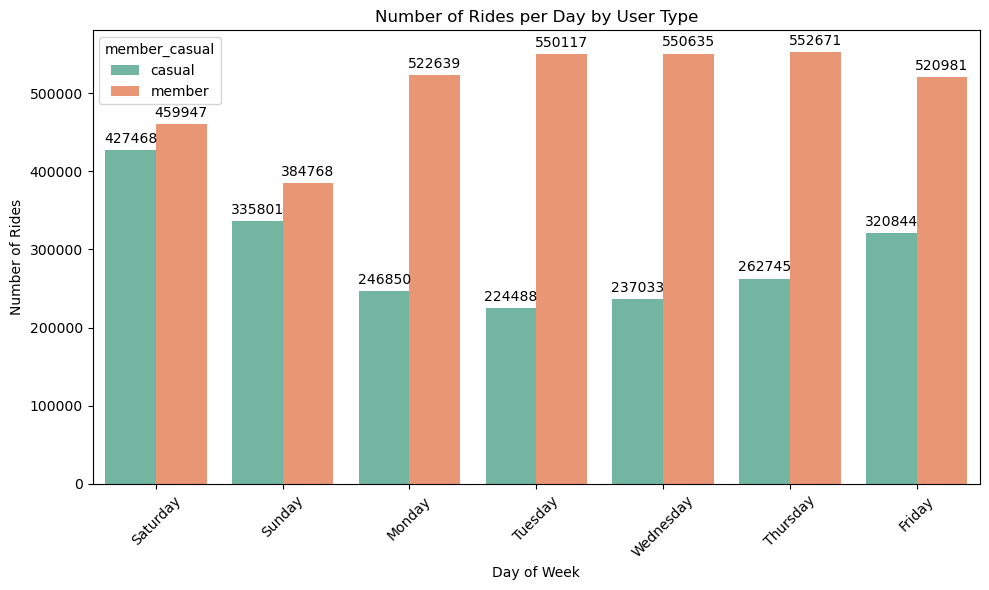

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rides_per_day, x='day_of_week', y='ride_count', hue='member_casual', palette='Set2')

plt.title('Number of Rides per Day by User Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

# إظهار الأرقام فوق الأعمدة
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18032\2714374733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration, x='member_casual', y='ride_duration_min', palette=['skyblue', 'lightgreen'])


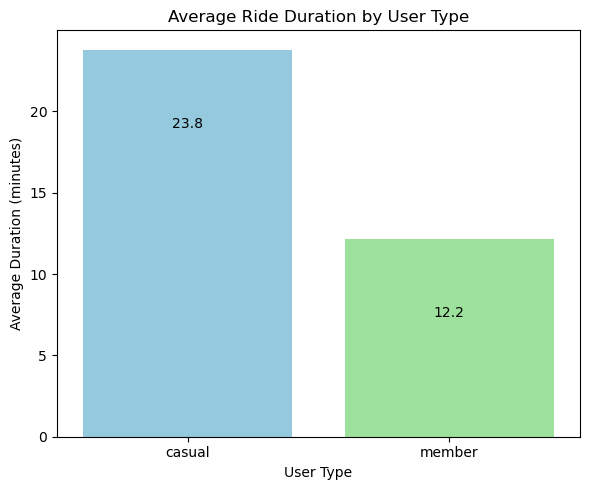

In [21]:
avg_duration = all_data.groupby('member_casual')['ride_duration_min'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=avg_duration, x='member_casual', y='ride_duration_min', palette=['skyblue', 'lightgreen'])

# كتابة القيم فوق الأعمدة
for i, row in avg_duration.iterrows():
    plt.text(i, row['ride_duration_min'] -5, round(row['ride_duration_min'], 1), ha='center', va='bottom')

plt.title('Average Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()
plt.savefig("Average Ride Duration by User Type.png", dpi=300, bbox_inches='tight')
plt.show()

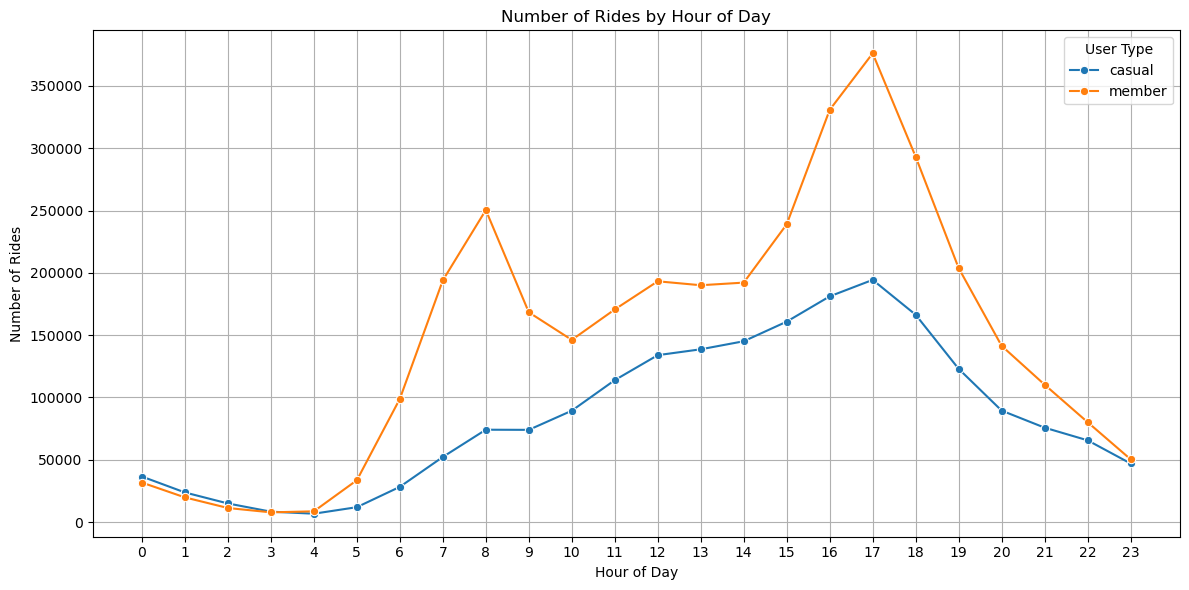

In [22]:
hourly_rides = all_data.groupby(['hour', 'member_casual']).size().reset_index(name='ride_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rides, x='hour', y='ride_count', hue='member_casual', marker='o')

plt.title('Number of Rides by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.legend(title='User Type')
plt.grid(True)
plt.tight_layout()
plt.savefig("Number of Rides by Hour of Day.png", dpi=300, bbox_inches='tight')
plt.show()


In [23]:
# حساب عدد الرحلات حسب نوع الدراجة ونوع المستخدم
bike_type_usage = all_data.groupby(['rideable_type', 'member_casual']).size().reset_index(name='ride_count')

# ترتيب البيانات للعرض بشكل أفضل 
bike_type_usage = bike_type_usage.sort_values(['rideable_type', 'member_casual'])

print(bike_type_usage)


      rideable_type member_casual  ride_count
0      classic_bike        casual      843169
1      classic_bike        member     1486356
2     electric_bike        casual     1126845
3     electric_bike        member     1996280
4  electric_scooter        casual       85215
5  electric_scooter        member       59122


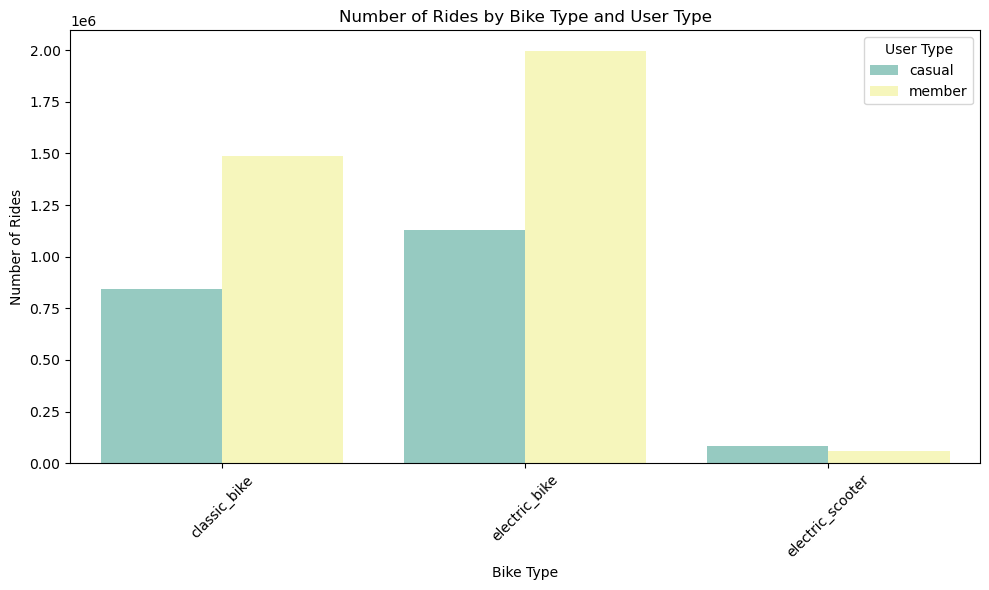

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike_type_usage, x='rideable_type', y='ride_count', hue='member_casual', palette='Set3')

plt.title('Number of Rides by Bike Type and User Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='User Type')

plt.tight_layout()
plt.savefig("Number of Rides by Bike Type and User Type.png", dpi=300, bbox_inches='tight')
plt.show()


In [25]:
#اكثر المحطات استخداما كنقطة انطلاق
top_start_stations = all_data['start_station_name'].value_counts().head(10)
print("Top 10 Start Stations:")
print(top_start_stations)


Top 10 Start Stations:
start_station_name
Streeter Dr & Grand Ave               61663
Kingsbury St & Kinzie St              41946
DuSable Lake Shore Dr & Monroe St     40037
Michigan Ave & Oak St                 36433
DuSable Lake Shore Dr & North Blvd    35827
Clark St & Elm St                     33818
Clinton St & Washington Blvd          32406
Clinton St & Madison St               31896
Millennium Park                       30884
Wells St & Concord Ln                 29703
Name: count, dtype: int64


In [29]:
#اكثر المحطات استخدام كنقطة نهاية
top_end_stations = all_data['end_station_name'].value_counts().head(10)
print("Top 10 End Stations:")
print(top_end_stations)


Top 10 End Stations:
end_station_name
Streeter Dr & Grand Ave               62586
Kingsbury St & Kinzie St              41309
DuSable Lake Shore Dr & North Blvd    39816
DuSable Lake Shore Dr & Monroe St     38691
Michigan Ave & Oak St                 36290
Clark St & Elm St                     33081
Clinton St & Washington Blvd          32684
Clinton St & Madison St               32672
Millennium Park                       31013
Wells St & Concord Ln                 29898
Name: count, dtype: int64


In [26]:
#المقارنة بين المحطات حسب نوع المستخدم
start_by_user = all_data.groupby(['member_casual', 'start_station_name']).size().reset_index(name='ride_count')
top_start_by_user = start_by_user.sort_values('ride_count', ascending=False).groupby('member_casual').head(5)

print("Top 5 Start Stations by User Type:")
print(top_start_by_user)


Top 5 Start Stations by User Type:
     member_casual                  start_station_name  ride_count
1492        casual             Streeter Dr & Grand Ave       48062
297         casual   DuSable Lake Shore Dr & Monroe St       31684
2153        member            Kingsbury St & Kinzie St       31494
1853        member        Clinton St & Washington Blvd       25935
1849        member             Clinton St & Madison St       23745
1824        member                   Clark St & Elm St       23642
685         casual               Michigan Ave & Oak St       23308
1772        member               Canal St & Madison St       21411
692         casual                     Millennium Park       21288
298         casual  DuSable Lake Shore Dr & North Blvd       20725


C:\Users\USER\AppData\Local\Temp\ipykernel_18032\3378684867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette="viridis")


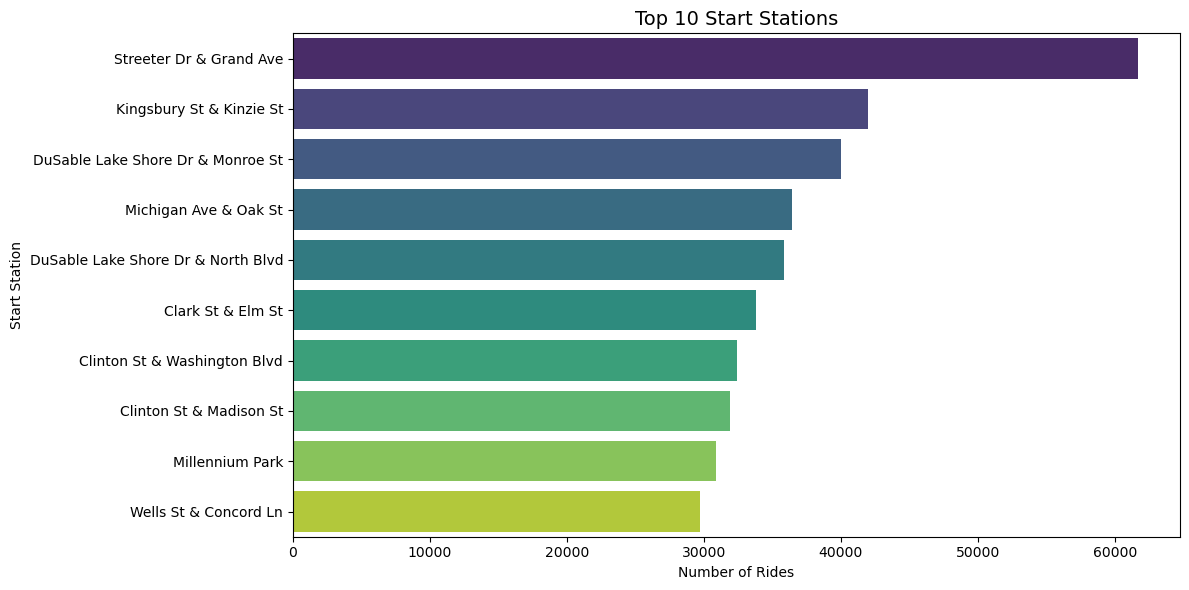

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette="viridis")
plt.title("Top 10 Start Stations", fontsize=14)
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.tight_layout()
plt.savefig("Top 10 Start Stations.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_18032\2673222512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_end_stations.values, y=top_end_stations.index, palette="magma")


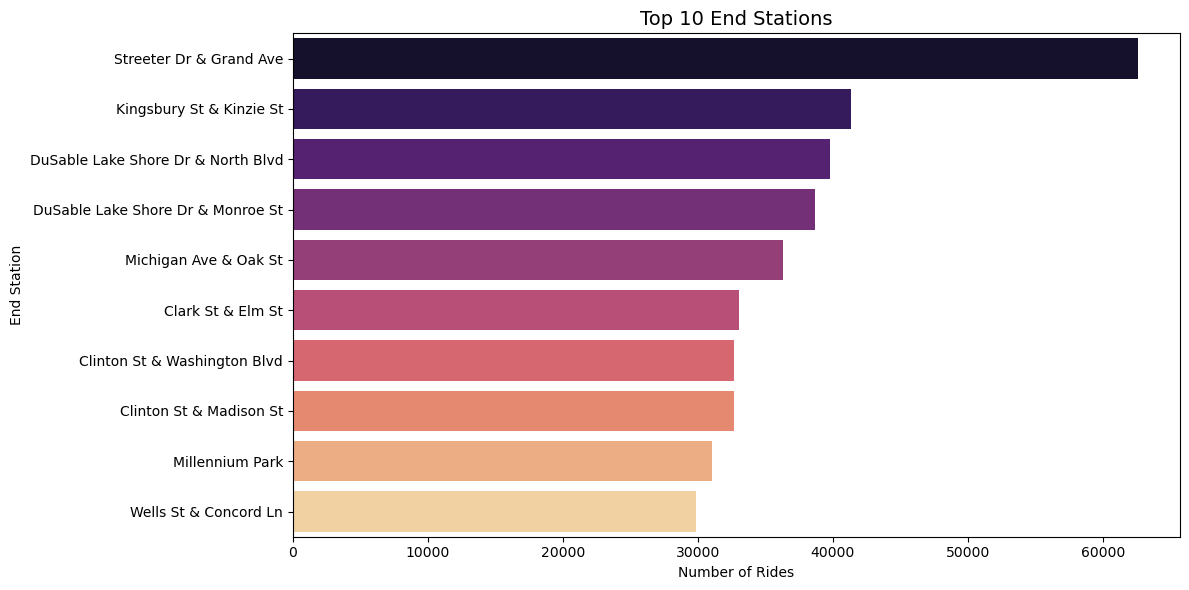

In [30]:
##import seaborn as sns
##import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x=top_end_stations.values, y=top_end_stations.index, palette="magma")
plt.title("Top 10 End Stations", fontsize=14)
plt.xlabel("Number of Rides")
plt.ylabel("End Station")
plt.tight_layout()
plt.savefig("Top 10 End Stations.png", dpi=300, bbox_inches='tight')
plt.show()


In [31]:
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['month'] = all_data['started_at'].dt.to_period('M') 
monthly_counts = all_data.groupby(['month', 'member_casual']).size().unstack()


<Figure size 1200x600 with 0 Axes>

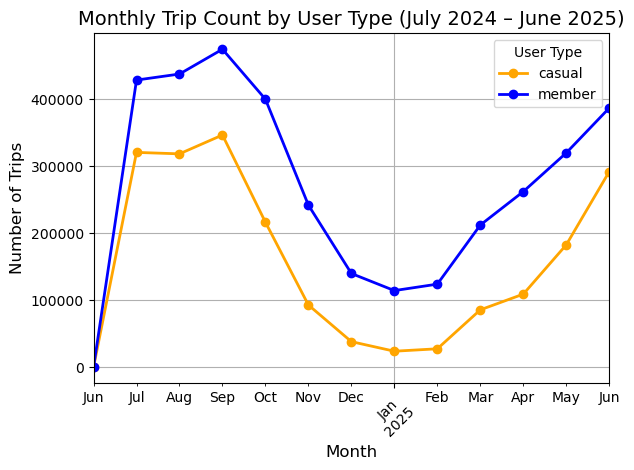

In [32]:
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', linewidth=2, color=['orange', 'blue'])

plt.title('Monthly Trip Count by User Type (July 2024 – June 2025)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.savefig("Monthly Trip Count by User Type.png", dpi=300, bbox_inches='tight')
plt.show()

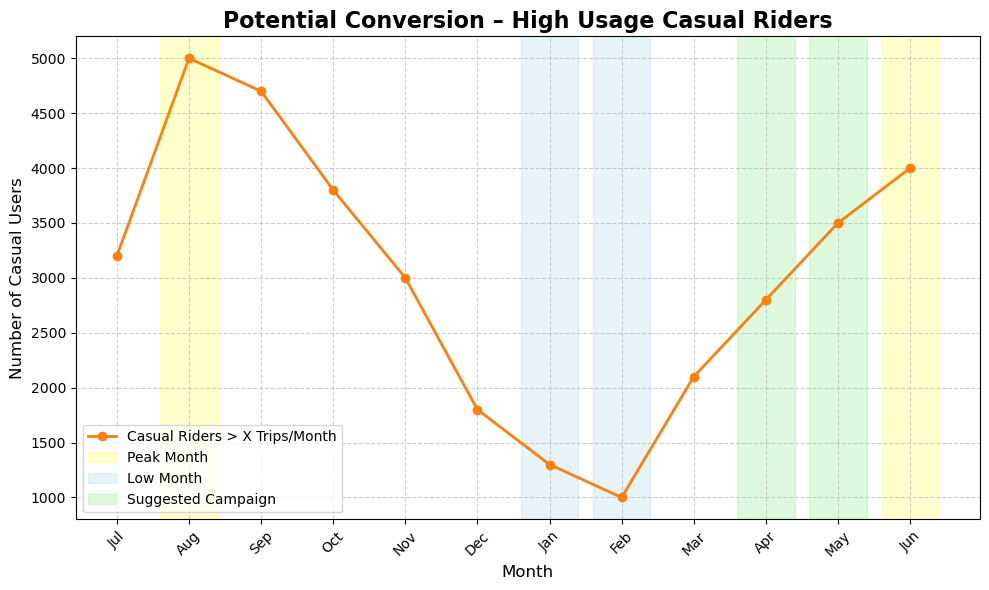

In [46]:
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
          'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
high_usage_counts = [3200, 5000, 4700, 3800, 3000, 1800,
                     1300, 1000, 2100, 2800, 3500, 4000]

plt.figure(figsize=(10, 6))
plt.plot(months, high_usage_counts, marker='o', color='#FF7F0E', linewidth=2,
         label='Casual Riders > X Trips/Month')
# تظليل أشهر الذروة باللون الأصفر
peak_months = ['Aug', 'Jun']
for peak in peak_months:
    idx = months.index(peak)
    plt.axvspan(idx - 0.4, idx + 0.4, color='yellow', alpha=0.2,
                label='Peak Month' if peak == peak_months[0] else "")
#تظليل أشهر الانخفاض باللون الأزرق الفاتح

low_months = ['Jan', 'Feb']
for low in low_months:
    idx = months.index(low)
    plt.axvspan(idx - 0.4, idx + 0.4, color='lightblue', alpha=0.3,
                label='Low Month' if low == low_months[0] else "")

# تظليل أشهر الحملات التسويقية المقترحة باللون الأخضر الفاتح
campaign_months = ['Apr', 'May']
for camp in campaign_months:
    idx = months.index(camp)
    plt.axvspan(idx - 0.4, idx + 0.4, color='lightgreen', alpha=0.3,
                label='Suggested Campaign' if camp == campaign_months[0] else "")



plt.title('Potential Conversion – High Usage Casual Riders', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Casual Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()


plt.savefig("Potential Conversion – High Usage Casual Riders.png", dpi=300, bbox_inches='tight')
plt.show()


In [33]:
print(all_data.head())

            ride_id  rideable_type              started_at  \
0  2658E319B13141F9  electric_bike 2024-07-11 08:15:14.784   
1  B2176315168A47CE  electric_bike 2024-07-11 15:45:07.851   
2  C2A9D33DF7EBB422  electric_bike 2024-07-11 08:24:48.192   
3  8BFEA406DF01D8AD  electric_bike 2024-07-11 08:46:06.864   
4  ECD3EF02E5EB73B6  electric_bike 2024-07-11 18:18:16.588   

                 ended_at start_station_name start_station_id  \
0 2024-07-11 08:17:56.335                NaN              NaN   
1 2024-07-11 16:06:04.243                NaN              NaN   
2 2024-07-11 08:28:05.237                NaN              NaN   
3 2024-07-11 09:14:11.664                NaN              NaN   
4 2024-07-11 18:30:20.288                NaN              NaN   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN      41.80     -87.59    41.79   -87.59   
1              NaN            NaN      41.79     -87.60    41.80   -87.59   
2    

In [36]:
all_data.to_csv("cyclistic_cleaned_2024.csv", index=False)
